In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/PFA_Dataset/data/final_data.csv')
df.head()

Unnamed: 0         username  posts_count  followers_count  followees_count  \
0           0    sofia.sapiens          317           112709              519   
1           1   matiamubysofia         3293           447999              741   
2           2       elliotbfit          879           679392              968   
3           3    elliotgarnaut          495            38961              855   
4           4  elliotjamesreay           54           259166              293   

                                       post_captions  \
0  ['Don’t spoil it for those who haven’t read th...   
1  ['From within \nThe within \nAs the without \n...   
2  ['I’ve decided it’s time to do a little cut bu...   
3  ['I love celebrating loved ones with good wine...   
4  ['Tweedle Dee…💙 #ad amazonmusic falloutonprime...   

                                            post_ids  \
0  ['1714603027', '1714431631', '1714342092', '17...   
1  ['1714124932', '1714050374', '1714049476', '17...   
2  ['1714680335', '1714408450', '1714317375', '17...   
3  ['1714470605', '1713779986', '1713475099', '17...   
4  ['1714658486', '1714056574', '1713636802', '17...   

                                                 bio  \
0  brain productivity seedling bravely round push...   
1  remembrance yoga somatics dance sensuality cir...   
2  coaching building mutual code join week summer...   
3              fashion stylist commentator contact e   
4                                                NaN   

                                               dates  \
0  DatetimeIndex(['2024-05-01 22:37:07+00:00', '2...   
1  DatetimeIndex(['2024-04-26 09:48:52+00:00', '2...   
2  DatetimeIndex(['2024-05-02 20:05:35+00:00', '2...   
3  DatetimeIndex(['2024-04-30 09:50:05+00:00', '2...   
4  DatetimeIndex(['2024-05-02 14:01:26+00:00', '2...   

                                         len_caption  ...  \
0  [59, 546, 29, 1931, 421, 45, 1238, 20, 229, 24...  ...   
1  [161, 207, 22, 2, 865, 61, 1049, 2, 1271, 92, ...  ...   
2  [900, 352, 167, 25, 25, 607, 29, 51, 24, 26, 1...  ...   
3  [299, 21, 468, 57, 9, 67, 247, 35, 245, 31, 34...  ...   
4  [44, 143, 32, 127, 134, 164, 124, 41, 122, 75,...  ...   

                                            nb_emoji  avg_emojis  \
0  [2, 5, 0, 18, 3, 0, 8, 0, 6, 0, 1, 3, 12, 3, 0...    2.480000   
1  [0, 1, 0, 0, 6, 1, 1, 1, 6, 0, 1, 1, 0, 0, 0, ...    1.514851   
2  [9, 2, 1, 0, 0, 5, 0, 0, 0, 0, 2, 6, 1, 0, 0, ...    1.161290   
3  [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...    0.490000   
4  [1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, ...    1.287129   

                                     hashtags_unique  \
0  ['#journaling', '#journalingprompts', '#journa...   
1  ['#MarcCainGirls', '#KnittedInGermany', '#marc...   
2  ['#fitness', '#motivation', '#fitness', '#fitn...   
3  ['#AD', '#StHugo', '#MeccaMoment', '#StHugo', ...   
4  ['#ad', '#singing', '#reels', '#explore', '#ib...   

                                            hashtags  \
0  [[], [], [], [], [], [], [], [], [], [], [], [...   
1  [[], [], [], [], [], [], [], [], [], [], [], [...   
2  [['#fitness', '#motivation'], ['#fitness'], []...   
3  [['#AD', '#StHugo'], [], ['#MeccaMoment'], [],...   
4  [['#ad'], ['#singing', '#reels', '#explore', '...   

                                      clean_captions  O  C  E  A  N  
0  ['spoil read whole thing shushing face', 'scro...  0  1  0  1  1  
1  ['within within without moment honey pot movem...  0  0  0  1  1  
2  ['decided time little cut fat loss right arrow...  0  1  0  1  0  
3  ['love good wine drwines x perfect dr cabernet...  0  1  1  0  0  
4  ['tweedle dee blue heart', 'know name broken h...  1  0  0  1  0  

[5 rows x 26 columns]

In [ ]:
df['post_ids'] = df['post_ids'].apply(eval)
df['len_caption'] = df['len_caption'].apply(eval)

# Calculate number of posts and captions for each user
df['num_posts'] = df['post_ids'].apply(len)
df['num_captions'] = df['len_caption'].apply(len)


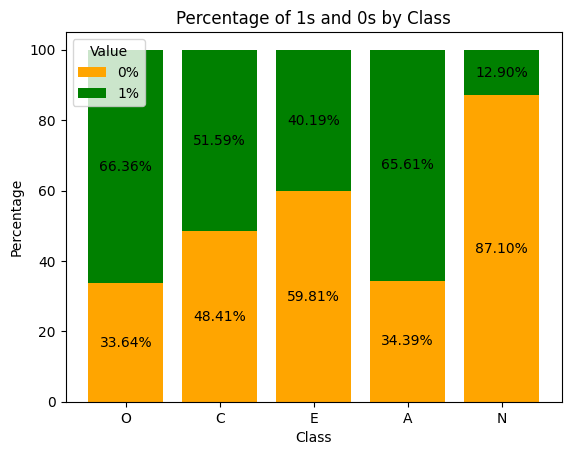

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class_columns = ['O', 'C', 'E', 'A', 'N']
# Initialize plot data
plot_data = []

for i, column in enumerate(class_columns):
    # Calculate the counts of 1s and 0s
    counts = df[column].value_counts(normalize=True) * 100

    # Plot stacked bars
    plt.bar(i, counts[0], color='orange', label='0%' if i == 0 else None)
    plt.bar(i, counts[1], bottom=counts[0], color='green', label='1%' if i == 0 else None)

    plt.text(i, counts[0] / 2, f'{counts[0]:.2f}%', ha='center', va='center', color='black')
    plt.text(i, counts[0] + counts[1] / 2, f'{counts[1]:.2f}%', ha='center', va='center', color='black')

# Customize plot
plt.title('Percentage of 1s and 0s by Class')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.xticks(range(len(class_columns)), class_columns)
plt.legend(title='Value')

# Save plot as an image
plt.savefig('class_percentage_plot.png')

# Show plot
plt.show()


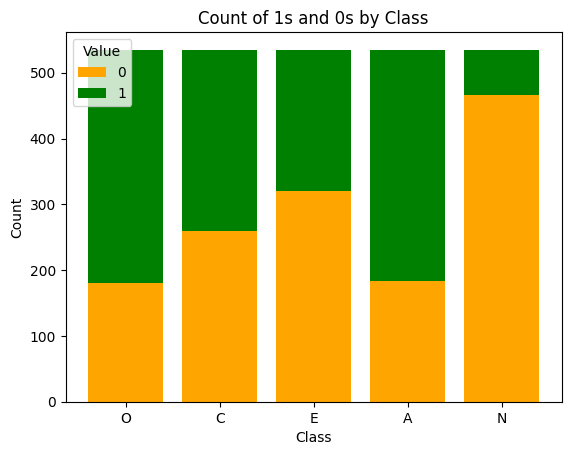

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = []

# List of class columns
class_columns = ['O', 'C', 'E', 'A', 'N']

for i, column in enumerate(class_columns):
    # Calculate counts of 1s and 0s for the current class
    counts = df[column].value_counts()

    # Plot stacked bars
    plt.bar(i, counts[0], color='orange', label='0' if i == 0 else None)
    plt.bar(i, counts[1], bottom=counts[0], color='green', label='1' if i == 0 else None)

# Customize plot
plt.title('Count of 1s and 0s by Class')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(range(len(class_columns)), class_columns)
plt.legend(title='Value')
plt.show()

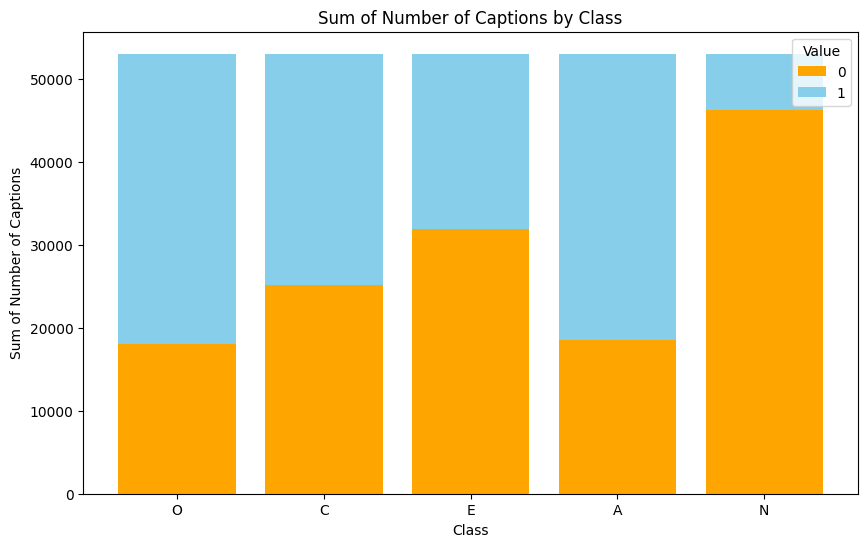

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = []

# List of class columns
class_columns = ['O', 'C', 'E', 'A', 'N']

# Calculate sum of num_captions for each class
class_sum_0 = [df[df[column] == 0]['num_captions'].sum() for column in class_columns]
class_sum_1 = [df[df[column] == 1]['num_captions'].sum() for column in class_columns]

# Plot the sum of num_captions for each class
plt.figure(figsize=(10, 6))
plt.bar(class_columns, class_sum_0, color='orange', label='0')
plt.bar(class_columns, class_sum_1, bottom=class_sum_0, color='skyblue', label='1')
plt.title('Sum of Number of Captions by Class')
plt.xlabel('Class')
plt.ylabel('Sum of Number of Captions')
plt.legend(title='Value')
plt.show()

In [ ]:
df.head()

Unnamed: 0         username  posts_count  followers_count  followees_count  \
0           0    sofia.sapiens          317           112709              519   
1           1   matiamubysofia         3293           447999              741   
2           2       elliotbfit          879           679392              968   
3           3    elliotgarnaut          495            38961              855   
4           4  elliotjamesreay           54           259166              293   

                                       post_captions  \
0  ['Don’t spoil it for those who haven’t read th...   
1  ['From within \nThe within \nAs the without \n...   
2  ['I’ve decided it’s time to do a little cut bu...   
3  ['I love celebrating loved ones with good wine...   
4  ['Tweedle Dee…💙 #ad amazonmusic falloutonprime...   

                                            post_ids  \
0  [1714603027, 1714431631, 1714342092, 171425249...   
1  [1714124932, 1714050374, 1714049476, 171346260...   
2  [1714680335, 1714408450, 1714317375, 171398457...   
3  [1714470605, 1713779986, 1713475099, 171317582...   
4  [1714658486, 1714056574, 1713636802, 171362359...   

                                                 bio  \
0  brain productivity seedling bravely round push...   
1  remembrance yoga somatics dance sensuality cir...   
2  coaching building mutual code join week summer...   
3              fashion stylist commentator contact e   
4                                                NaN   

                                               dates  \
0  DatetimeIndex(['2024-05-01 22:37:07+00:00', '2...   
1  DatetimeIndex(['2024-04-26 09:48:52+00:00', '2...   
2  DatetimeIndex(['2024-05-02 20:05:35+00:00', '2...   
3  DatetimeIndex(['2024-04-30 09:50:05+00:00', '2...   
4  DatetimeIndex(['2024-05-02 14:01:26+00:00', '2...   

                                         len_caption  ...  \
0  [59, 546, 29, 1931, 421, 45, 1238, 20, 229, 24...  ...   
1  [161, 207, 22, 2, 865, 61, 1049, 2, 1271, 92, ...  ...   
2  [900, 352, 167, 25, 25, 607, 29, 51, 24, 26, 1...  ...   
3  [299, 21, 468, 57, 9, 67, 247, 35, 245, 31, 34...  ...   
4  [44, 143, 32, 127, 134, 164, 124, 41, 122, 75,...  ...   

                                     hashtags_unique  \
0  ['#journaling', '#journalingprompts', '#journa...   
1  ['#MarcCainGirls', '#KnittedInGermany', '#marc...   
2  ['#fitness', '#motivation', '#fitness', '#fitn...   
3  ['#AD', '#StHugo', '#MeccaMoment', '#StHugo', ...   
4  ['#ad', '#singing', '#reels', '#explore', '#ib...   

                                            hashtags  \
0  [[], [], [], [], [], [], [], [], [], [], [], [...   
1  [[], [], [], [], [], [], [], [], [], [], [], [...   
2  [['#fitness', '#motivation'], ['#fitness'], []...   
3  [['#AD', '#StHugo'], [], ['#MeccaMoment'], [],...   
4  [['#ad'], ['#singing', '#reels', '#explore', '...   

                                      clean_captions  O  C  E  A  N num_posts  \
0  ['spoil read whole thing shushing face', 'scro...  0  1  0  1  1       100   
1  ['within within without moment honey pot movem...  0  0  0  1  1       100   
2  ['decided time little cut fat loss right arrow...  0  1  0  1  0       100   
3  ['love good wine drwines x perfect dr cabernet...  0  1  1  0  0       100   
4  ['tweedle dee blue heart', 'know name broken h...  1  0  0  1  0       100   

  num_captions  
0          100  
1          101  
2          186  
3          100  
4          101  

[5 rows x 28 columns]

In [ ]:
print(df['dates'])


0      DatetimeIndex(['2024-05-01 22:37:07+00:00', '2...
1      DatetimeIndex(['2024-04-26 09:48:52+00:00', '2...
2      DatetimeIndex(['2024-05-02 20:05:35+00:00', '2...
3      DatetimeIndex(['2024-04-30 09:50:05+00:00', '2...
4      DatetimeIndex(['2024-05-02 14:01:26+00:00', '2...
                             ...                        
530    DatetimeIndex(['2024-05-08 16:10:16+00:00', '2...
531    DatetimeIndex(['2024-05-09 05:09:13+00:00', '2...
532    DatetimeIndex(['2024-05-06 18:07:28+00:00', '2...
533    DatetimeIndex(['2024-05-09 14:44:04+00:00', '2...
534    DatetimeIndex(['2024-05-06 18:04:31+00:00', '2...
Name: dates, Length: 535, dtype: object


In [ ]:
print(df.dtypes)

Unnamed: 0           int64
username            object
posts_count          int64
followers_count      int64
followees_count      int64
post_captions       object
post_ids            object
bio                 object
dates               object
len_caption         object
len_bio              int64
avg_len_caption    float64
nb_hashtags          int64
nb_mentions          int64
duration           float64
frequency          float64
nb_emoji            object
avg_emojis         float64
hashtags_unique     object
hashtags            object
clean_captions      object
O                    int64
C                    int64
E                    int64
A                    int64
N                    int64
dtype: object


In [ ]:
df['dates'] = df['dates'].str[14:-40]

In [ ]:
df['dates'] = df['dates'].str[1:-16]

2024-05-01 22:37:07+00:00', '2024-04-29 23:00:31+00:00',
               '2024-04-28 22:08:12+00:00', '2024-04-27 21:14:53+00:00',
               '2024-04-26 01:29:22+00:00', '2024-04-23 16:27:33+00:00',
               '2024-04-22 13:49:48+00:00', '2024-04-21 16:25:36+00:00',
               '2024-04-21 00:12:50+00:00', '2024-04-20 03:31:32+00:00',
               '2024-04-17 20:49:31+00:00', '2024-04-16 21:18:51+00:00',
               '2024-04-15 23:24:53+00:00', '2024-04-13 00:35:46+00:00',
               '2024-04-10 23:54:32+00:00', '2024-04-09 21:54:57+00:00',
               '2024-04-08 17:59:03+00:00', '2024-04-06 21:42:52+00:00',
               '2024-04-04 18:30:08+00:00', '2024-04-03 13:53:45+00:00',
               '2024-04-02 18:35:39+00:00', '2024-03-31 18:05:40+00:00',
               '2024-03-28 00:21:21+00:00', '2024-03-26 20:56:25+00:00',
               '2024-03-25 22:45:27+00:00', '2024-03-24 21:49:53+00:00',
               '2024-03-23 17:29:25+00:00', '2024-03-22 19:04:04+00

In [ ]:
from datetime import datetime
import pandas as pd

# Assuming 'df' is your DataFrame and 'dates' column contains string representation of lists
# Splitting the string by comma and then stripping whitespace and quotation marks
dates = df['dates'].str.strip('[]').str.split(',').explode().str.strip().str.strip("'")

# Extract years from each date
years = []
for date in dates:
    try:
        years.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S%z").year)
    except ValueError as e:
        print(f"Error parsing date '{date}': {e}")

# print(years)


Error parsing date 'DatetimeIndex(['2024-05-01 22:37:07+00:00': time data "DatetimeIndex(['2024-05-01 22:37:07+00:00" does not match format '%Y-%m-%d %H:%M:%S%z'
Error parsing date '2023-06-27 12:30:00+00:00']': unconverted data remains: ']
Error parsing date 'dtype='datetime64[ns': time data "dtype='datetime64[ns" does not match format '%Y-%m-%d %H:%M:%S%z'
Error parsing date 'UTC]': time data 'UTC]' does not match format '%Y-%m-%d %H:%M:%S%z'
Error parsing date 'freq=None)': time data 'freq=None)' does not match format '%Y-%m-%d %H:%M:%S%z'
Error parsing date 'DatetimeIndex(['2024-04-26 09:48:52+00:00': time data "DatetimeIndex(['2024-04-26 09:48:52+00:00" does not match format '%Y-%m-%d %H:%M:%S%z'
Error parsing date '2023-08-11 14:27:55+00:00']': unconverted data remains: ']
Error parsing date 'dtype='datetime64[ns': time data "dtype='datetime64[ns" does not match format '%Y-%m-%d %H:%M:%S%z'
Error parsing date 'UTC]': time data 'UTC]' does not match format '%Y-%m-%d %H:%M:%S%z'
Er

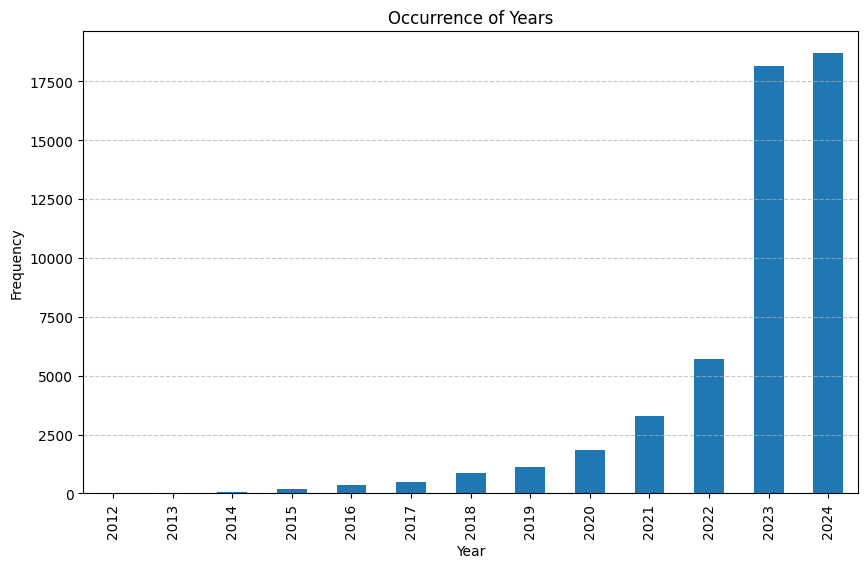

In [ ]:
years_series = pd.Series(years)

import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
years_series.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Occurrence of Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Save plot as an image
plt.savefig('year_distribution.png')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os
import csv
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import re
import ast

In [ ]:
def print_insights(df):
    print("Shape : ",df.shape)
    print("Infos : ")
    print( df.info())
    print("Description : ",df.describe())

def scan_target(df):
    open_counts = df['O'].value_counts()
    concient_counts = df['C'].value_counts()
    extro_counts = df['E'].value_counts()
    agreeable_counts = df['A'].value_counts()
    neurotic_counts = df['N'].value_counts()

    print(f"Open\n0: {open_counts[0]}\n1: {open_counts[1]}")
    print(f"Concient\n0: {concient_counts[0]}\n1: {concient_counts[1]}")
    print(f"Extro\n0: {extro_counts[0]}\n1: {extro_counts[1]}")
    print(f"Agreeble\n0: {agreeable_counts[0]}\n1: {agreeable_counts[1]}")
    print(f"Neurotic\n0: {neurotic_counts[0]}\n1: {neurotic_counts[1]}")


# This code makes a function to plot four scatter plots in one figure. Each plot shows how a specific personality trait ('O', 'C', 'E', 'A', 'N') varies across different individuals ('ID') based on a given attribute (attr) from a DataFrame (df).

def plot_post_frequency(df, title, attr):
    fig, axes = plt.subplots(ncols=5, figsize=(30, 10))
    fig.suptitle(title, fontsize=16)
    sns.scatterplot(data=df, x='ID', y=attr, hue='O', ax=axes[0])
    axes[0].set_title("Open")
    sns.scatterplot(data=df, x='ID', y=attr, hue='C', ax=axes[1])
    axes[1].set_title("Conscientiousness")
    sns.scatterplot(data=df, x='ID', y=attr, hue='E', ax=axes[2])
    axes[2].set_title("Extroversion")
    sns.scatterplot(data=df, x='ID', y=attr, hue='A', ax=axes[3])
    axes[3].set_title("Agreeablness")
    sns.scatterplot(data=df, x='ID', y=attr, hue='N', ax=axes[4])
    axes[4].set_title("Neurotisicim")
    # Save plot as an image
    plt.savefig('scatter_plot.png')


In [ ]:
print_insights(df)

Shape :  (535, 28)
Infos : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               535 non-null    int64  
 1   username         535 non-null    object 
 2   posts_count      535 non-null    int64  
 3   followers_count  535 non-null    int64  
 4   followees_count  535 non-null    int64  
 5   post_captions    535 non-null    object 
 6   post_ids         535 non-null    object 
 7   bio              482 non-null    object 
 8   dates            535 non-null    object 
 9   len_caption      535 non-null    object 
 10  len_bio          535 non-null    int64  
 11  avg_len_caption  535 non-null    float64
 12  nb_hashtags      535 non-null    int64  
 13  nb_mentions      535 non-null    int64  
 14  duration         535 non-null    float64
 15  frequency        535 non-null    float64
 16  nb_emoji         535 non-null    o

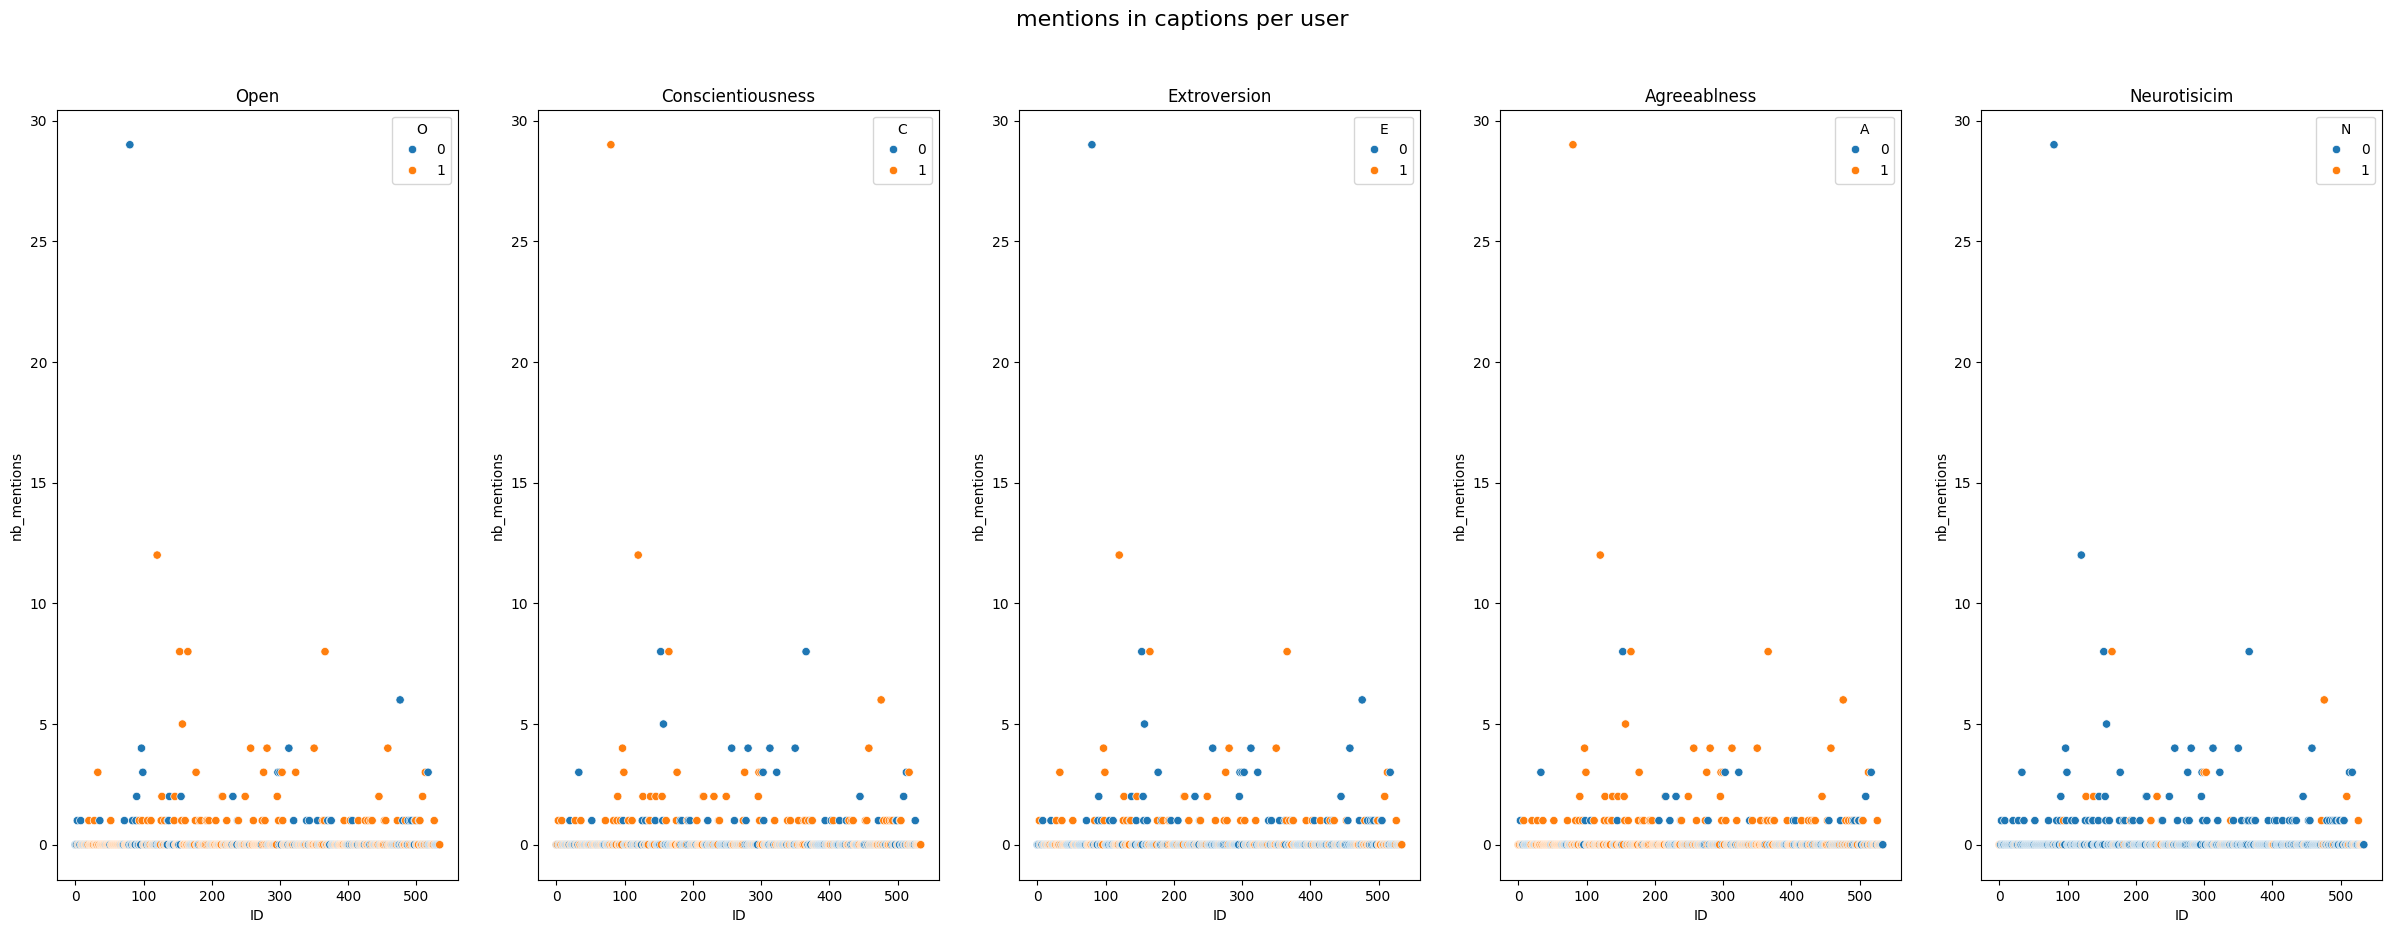

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'ID'})

# Length  captions
#plot_post_frequency(df,'length of captions per user','avg_len_caption')

# Hashtags
#plot_post_frequency(df,'hashtags in captions per user','nb_hashtags')

# Mentions
plot_post_frequency(df,'mentions in captions per user','nb_mentions')

# fraquency of posting
#plot_post_frequency(df,'frequency of using per user','frequency')

# followees_count
#plot_post_frequency(df,'followees_count per user','followees_count')

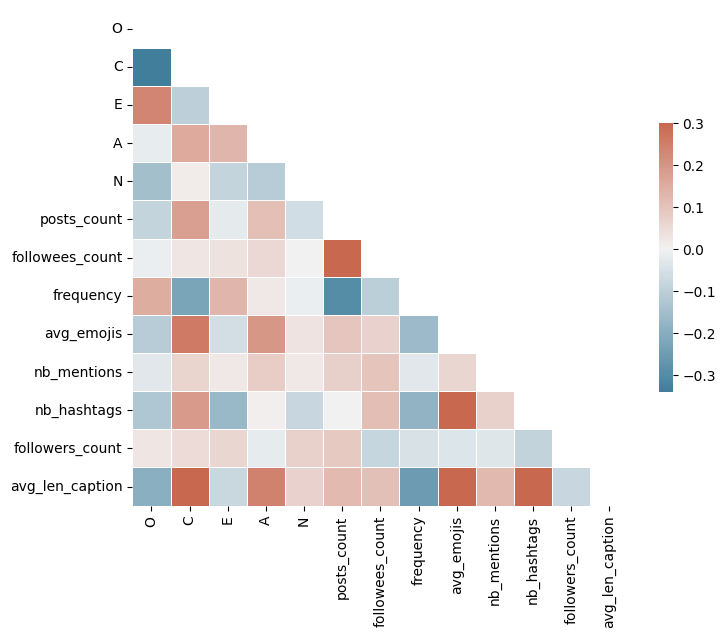

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[[
    'O', 'C', 'E', 'A', 'N', 'posts_count',
    'followees_count','frequency',
    'avg_emojis','nb_mentions','nb_hashtags','followers_count','avg_len_caption']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Save plot as an image
plt.savefig('correlation_matrix1.png')
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



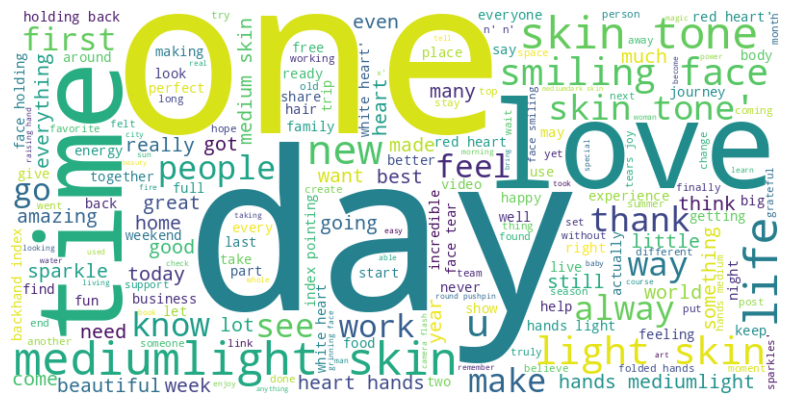

['#ad', '#singing', '#reels', '#explore', '#ibelievetomysoul', '#raycharles', '#tiktokmalaysia', '#tiktokaustralia', '#songconvo', '#explorepage', '#singing', '#reels', '#explore', '#hozier', '#toosweet', '#tiktokmalaysia', '#tiktokaustralia', '#songconvo', '#explorepage', '#singing', '#reels', '#explore', '#youngandbeautiful', '#lanadelrey', '#tiktokmalaysia', '#tiktokaustralia', '#songconvo', '#explorepage', '#singing', '#reels', '#explore', '#theinkspots', '#idontwanttosettheworldonfire', '#tiktokmalaysia', '#tiktokaustralia', '#songconvo', '#explorepage', '#singing', '#reels', '#explore', '#thechords', '#shboom', '#tiktokmalaysia', '#tiktokaustralia', '#songconvo', '#explorepage', '#singing', '#reels', '#explore', '#amywinehouse', '#tiktokmalaysia', '#tiktokaustralia', '#songconvo', '#explorepage', '#BackToBlack', '#singing', '#reels', '#explore', '#losecontrol', '#teddyswims', '#tiktokmalaysia', '#tiktokaustralia', '#songconvo', '#explorepage', '#singing', '#reels', '#explore', '#

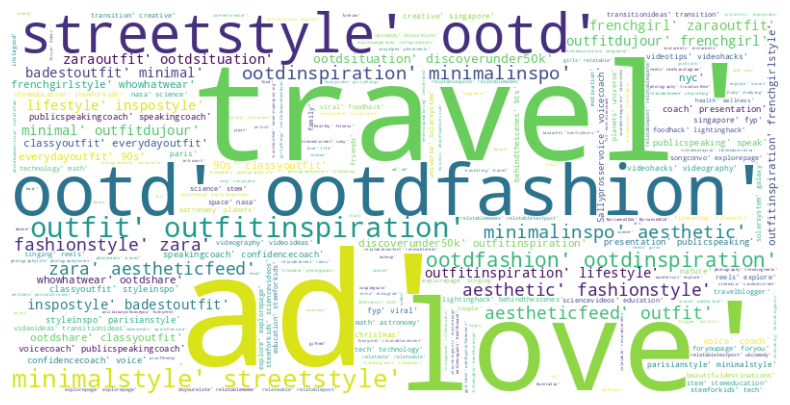

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

def generate_wordcloud_from_column(df, column_name,criteria):
    # Step 1: Filter the DataFrame based on the special value in the column
    filtered_df = df[df[criteria] == 1]

    # Step 2: Join the lists of strings in the filtered column into a single string
    text = ' '.join(filtered_df[column_name].astype(str))
    print(text)
    # Step 3: Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


generate_wordcloud_from_column(df, 'clean_captions','O')
generate_wordcloud_from_column(df, 'hashtags_unique','O')


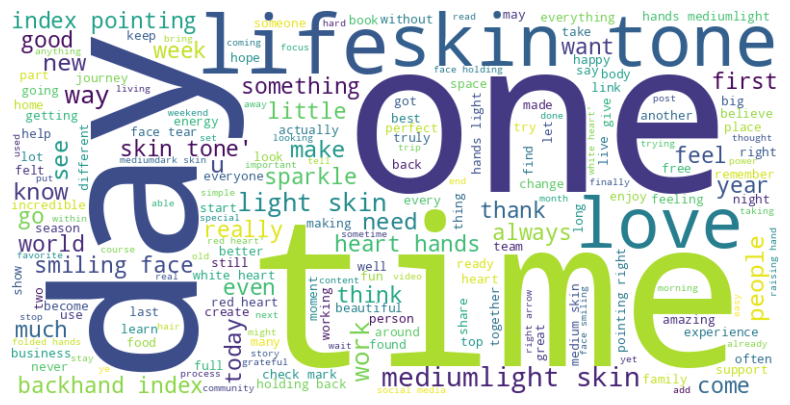

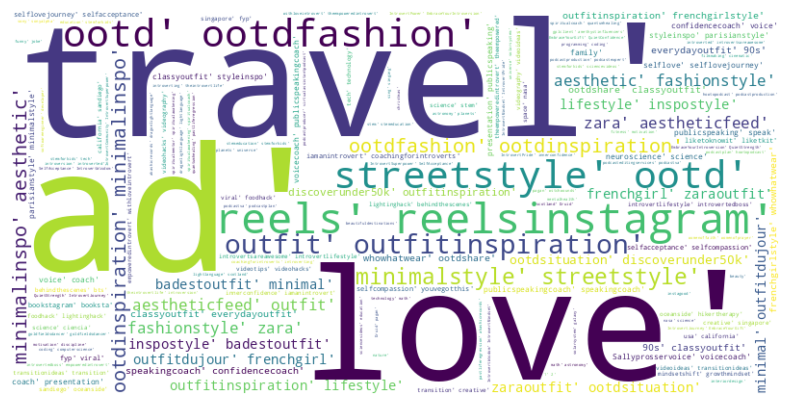

In [ ]:
generate_wordcloud_from_column(df, 'clean_captions','C')
generate_wordcloud_from_column(df, 'hashtags_unique','C')

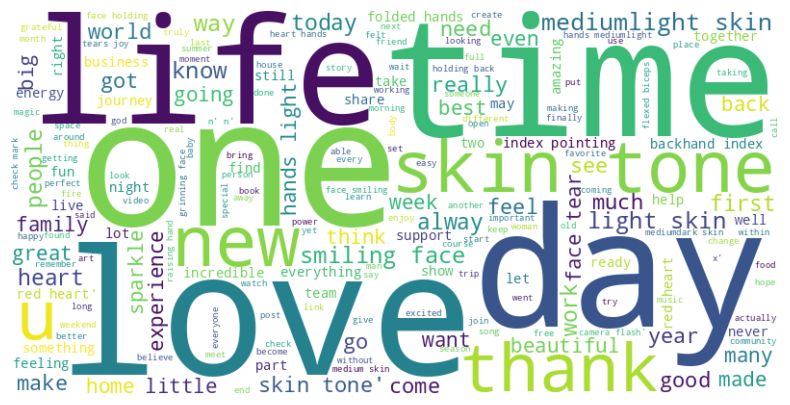

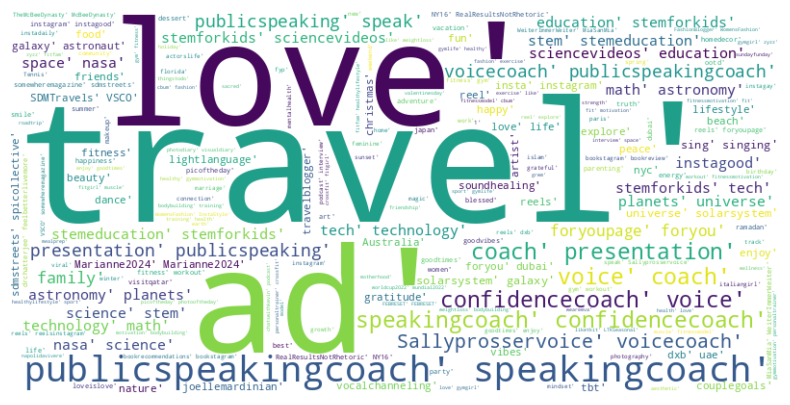

In [ ]:
generate_wordcloud_from_column(df, 'clean_captions','E')
generate_wordcloud_from_column(df, 'hashtags_unique','E')

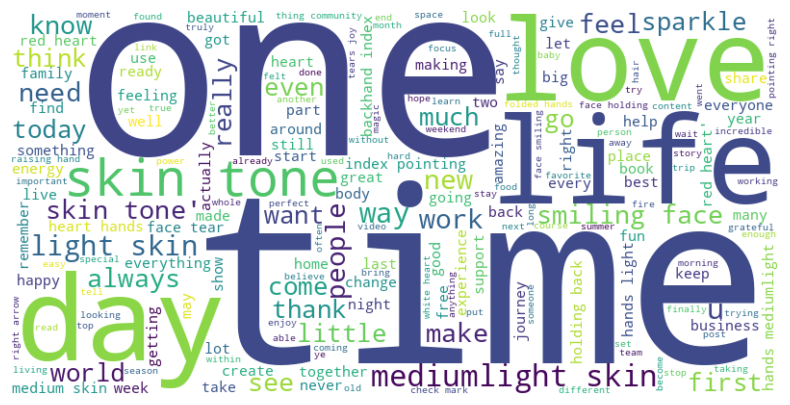

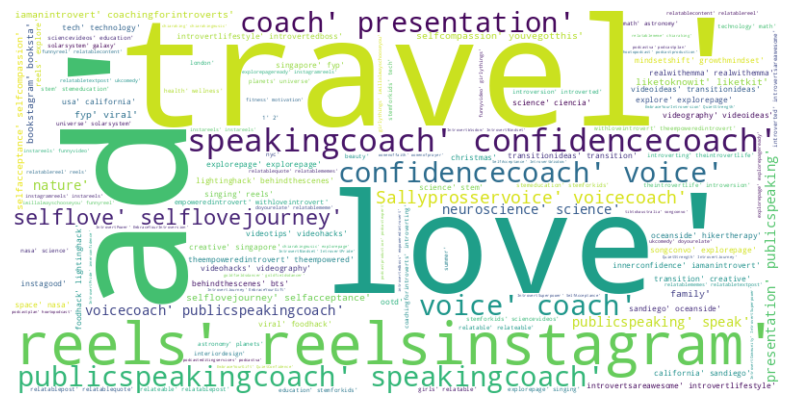

In [ ]:
generate_wordcloud_from_column(df, 'clean_captions','A')
generate_wordcloud_from_column(df, 'hashtags_unique','A')

In [ ]:
# correlation matrix vhtar mouraba3
# word cloud for each class ( hashtgs )
# word cloud for each class ( all captions)
#distribution of personnalities ( mostatillat / Radar Plots =losannge blue and red)
# sns.boxenplot == haram of numbers example ta3 training hours :


# example
# train = pd.DataFrame(train_df["training_hours"])
# train["TrainTest"] = "Train"
# test = pd.DataFrame(test_df["training_hours"])
# test["TrainTest"] = "Test"
# ax6.text(-0.65, 370, 'Training Hours', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
# comb_graph_temp_df = pd.concat([train, test], axis=0)
# sns.boxenplot(ax=ax6, y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=["gray", "#0e4f66"])
# ax6.set_xlabel("")
# ax6.set_ylabel("")

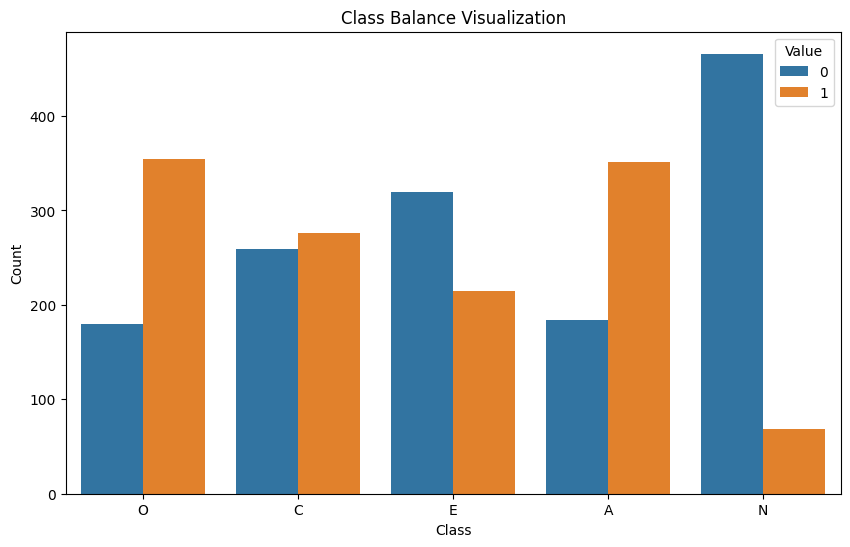

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = []

# List of class columns
class_columns = ['O', 'C', 'E', 'A', 'N']

# Iterate over each class column and calculate counts of 0s and 1s
for column in class_columns:
    count_0 = (df[column] == 0).sum()
    count_1 = (df[column] == 1).sum()
    plot_data.append([column, '0', count_0])
    plot_data.append([column, '1', count_1])

# Convert the plot data to a DataFrame
plot_df = pd.DataFrame(plot_data, columns=['Class', 'Value', 'Count'])

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', hue='Value', data=plot_df)
plt.title('Class Balance Visualization')
plt.ylabel('Count')
plt.xlabel('Class')
plt.legend(title='Value', loc='upper right')
plt.show()

<ipython-input-62-56b5aedc8c18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='O', y=metric, data=df, palette='Set2')


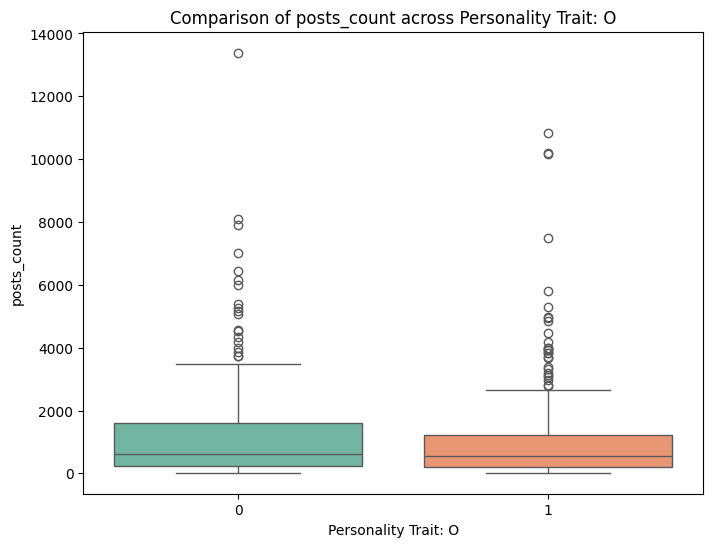

<ipython-input-62-56b5aedc8c18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='O', y=metric, data=df, palette='Set2')


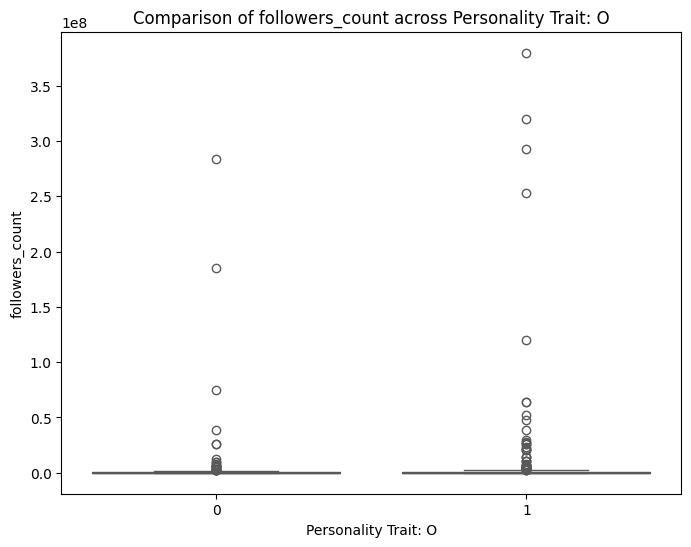

<ipython-input-62-56b5aedc8c18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='O', y=metric, data=df, palette='Set2')


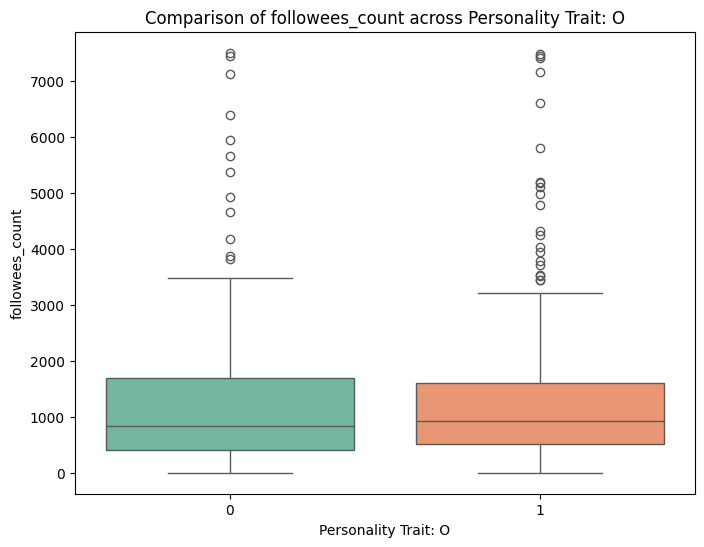

<ipython-input-62-56b5aedc8c18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='O', y=metric, data=df, palette='Set2')


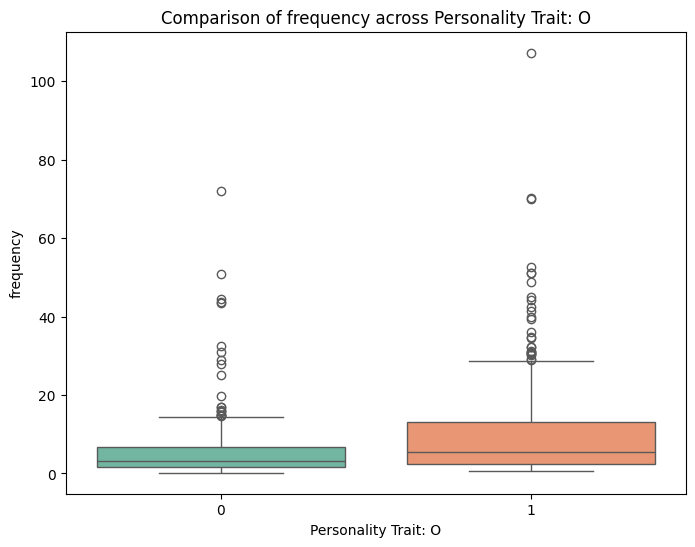

<ipython-input-62-56b5aedc8c18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='O', y=metric, data=df, palette='Set2')


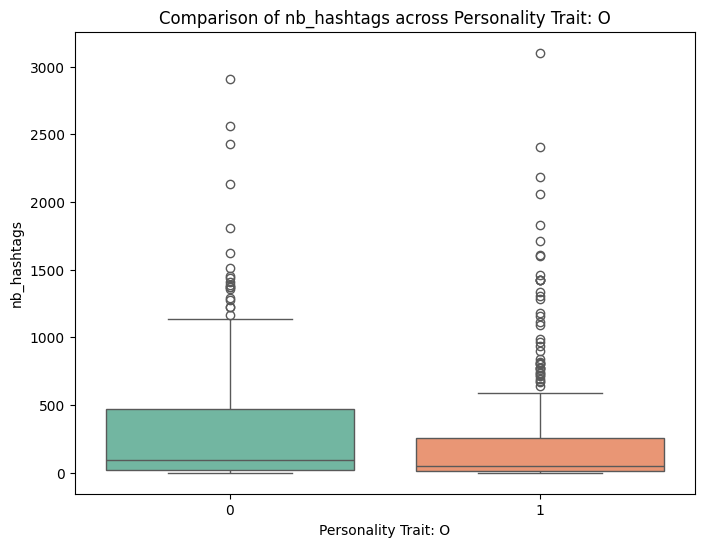

ValueError: Could not interpret value `mean_len` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [ ]:
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
metrics_to_compare = [ 'posts_count',
    'followees_count','frequency',
    'avg_emojis','nb_mentions','nb_hashtags','followers_count','avg_len_caption']
for metric in metrics_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='O', y=metric, data=df, palette='Set2')
    plt.xlabel('Personality Trait: O')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} across Personality Trait: O')
    plt.show()



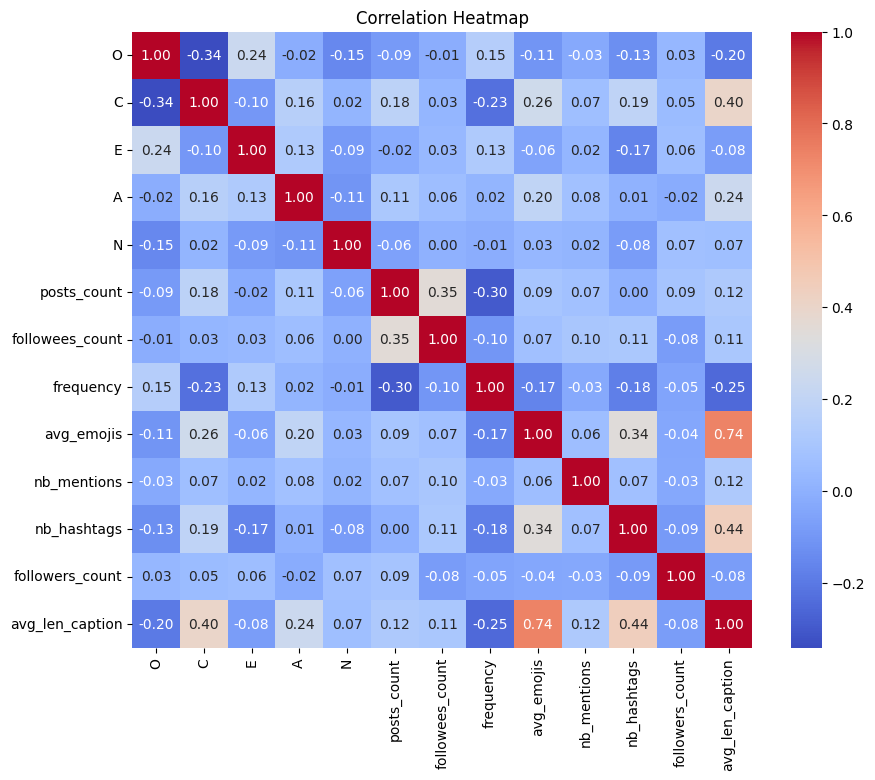

In [ ]:
# Assuming 'df' is your DataFrame
correlation_matrix = df[['O', 'C', 'E', 'A', 'N', 'posts_count',
    'followees_count','frequency',
    'avg_emojis','nb_mentions','nb_hashtags','followers_count','avg_len_caption']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_matrix2.png')
plt.show()

